# Data Prepration 

### Preparing data Country wise their total confirmed ,recovered and death cases till now

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
confirmed_cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
recovered_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
death_cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'


In [0]:
df_confirmed = pd.read_csv(confirmed_cases_url)


In [60]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92


In [61]:
df_confirmed.shape

(266, 143)

In [62]:
df_confirmed.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
6/4/20              0
6/5/20              0
6/6/20              0
6/7/20              0
6/8/20              0
Length: 143, dtype: int64

In [63]:
melt_df_confirmed = df_confirmed.melt(id_vars = ['Province/State','Country/Region','Lat','Long'])
melt_df_confirmed

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
36969,NaN,Sao Tome and Principe,0.186360,6.613081,6/8/20,513
36970,NaN,Yemen,15.552727,48.516388,6/8/20,496
36971,NaN,Comoros,-11.645500,43.333300,6/8/20,141
36972,NaN,Tajikistan,38.861034,71.276093,6/8/20,4609


In [0]:
melt_df_confirmed.drop(['Province/State','Lat','Long'],axis = 1,inplace = True)

In [0]:
melt_df_confirmed.rename(columns = {'Country/Region':'Country','variable':'Date','value':'Confirmed'},inplace = True)

In [0]:
melt_df_confirmed['Date'] = pd.to_datetime(melt_df_confirmed['Date'])

In [67]:
melt_df_confirmed

,Country,Date,Confirmed
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0
...,...,...,...
36969,Sao Tome and Principe,2020-06-08,513
36970,Yemen,2020-06-08,496
36971,Comoros,2020-06-08,141
36972,Tajikistan,2020-06-08,4609


In [68]:
current_confirmed = melt_df_confirmed.groupby('Date').get_group('2020-05-21')
current_confirmed

,Country,Date,Confirmed
31920,Afghanistan,2020-05-21,8676
31921,Albania,2020-05-21,969
31922,Algeria,2020-05-21,7728
31923,Andorra,2020-05-21,762
31924,Angola,2020-05-21,58
...,...,...,...
32181,Sao Tome and Principe,2020-05-21,251
32182,Yemen,2020-05-21,197
32183,Comoros,2020-05-21,34
32184,Tajikistan,2020-05-21,2350


In [69]:
current_confirmed['Country'].nunique()

188

In [70]:
current_confirmed['Country'].value_counts()

China                  33
Canada                 14
United Kingdom         11
France                 11
Australia               8
                       ..
Paraguay                1
Qatar                   1
Iran                    1
Trinidad and Tobago     1
Holy See                1
Name: Country, Length: 188, dtype: int64

In [71]:
current_confirmed['Total_confirmed'] = current_confirmed.groupby(['Country'])['Confirmed'].transform('sum')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
country_total_confirmed  = current_confirmed.drop_duplicates(subset=['Country'])
country_total_confirmed

,Country,Date,Confirmed,Total_confirmed
31920,Afghanistan,2020-05-21,8676,8676
31921,Albania,2020-05-21,969,969
31922,Algeria,2020-05-21,7728,7728
31923,Andorra,2020-05-21,762,762
31924,Angola,2020-05-21,58,58
...,...,...,...,...
32181,Sao Tome and Principe,2020-05-21,251,251
32182,Yemen,2020-05-21,197,197
32183,Comoros,2020-05-21,34,34
32184,Tajikistan,2020-05-21,2350,2350


In [73]:
country_total_confirmed.drop(['Date','Confirmed'],axis=1,inplace = True)
country_total_confirmed

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Total_confirmed
31920,Afghanistan,8676
31921,Albania,969
31922,Algeria,7728
31923,Andorra,762
31924,Angola,58
...,...,...
32181,Sao Tome and Principe,251
32182,Yemen,197
32183,Comoros,34
32184,Tajikistan,2350


In [0]:
country_total_confirmed.set_index('Country',inplace = True)

In [75]:
country_total_confirmed

,Total_confirmed
Country,
Afghanistan,8676
Albania,969
Algeria,7728
Andorra,762
Angola,58
...,...
Sao Tome and Principe,251
Yemen,197
Comoros,34


In [0]:
def data_countries(data_url,case_type,col_name):
    df = pd.read_csv(data_url)
    melt_df = df.melt(id_vars = ['Province/State','Country/Region','Lat','Long'])
    melt_df.drop(['Province/State','Lat','Long'],axis = 1,inplace = True)
    melt_df.rename(columns = {'Country/Region':'Country','variable':'Date','value':case_type},inplace = True)
    melt_df['Date'] = pd.to_datetime(melt_df['Date'])
    current = melt_df.groupby('Date').get_group('2020-05-21')
    current[col_name] = current.groupby(['Country'])[case_type].transform('sum')
    country_total  = current.drop_duplicates(subset=['Country'])
    country_total.drop(['Date',case_type],axis=1,inplace = True)
    country_total.set_index('Country',inplace = True)
    return country_total

In [77]:

df_recovered = data_countries(recovered_cases_url,"Recovered","Total_recovered")
df_death = data_countries(death_cases_url,"Death","Total_death")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
df_recovered

,Total_recovered
Country,
Afghanistan,938
Albania,771
Algeria,4062
Andorra,639
Angola,17
...,...
Sao Tome and Principe,4
Yemen,5
Comoros,8


In [79]:
df_death

,Total_death
Country,
Afghanistan,193
Albania,31
Algeria,575
Andorra,51
Angola,3
...,...
Sao Tome and Principe,8
Yemen,33
Comoros,1


In [0]:
country_corona_cases = country_total_confirmed.join(df_recovered).join(df_death)

In [81]:
country_corona_cases

,Total_confirmed,Total_recovered,Total_death
Country,,,
Afghanistan,8676,938,193
Albania,969,771,31
Algeria,7728,4062,575
Andorra,762,639,51
Angola,58,17,3
...,...,...,...
Sao Tome and Principe,251,4,8
Yemen,197,5,33
Comoros,34,8,1


In [0]:
country_corona_cases['Active_cases'] = country_corona_cases['Total_confirmed'] - (country_corona_cases['Total_recovered'] + country_corona_cases['Total_death'])

In [83]:
country_corona_cases

,Total_confirmed,Total_recovered,Total_death,Active_cases
Country,,,,
Afghanistan,8676,938,193,7545
Albania,969,771,31,167
Algeria,7728,4062,575,3091
Andorra,762,639,51,72
Angola,58,17,3,38
...,...,...,...,...
Sao Tome and Principe,251,4,8,239
Yemen,197,5,33,159
Comoros,34,8,1,25


### Data Prepration of daily confirmed,recovered and death cases

In [84]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92


In [85]:
daily_confirmed = df_confirmed.melt(id_vars = ['Province/State','Country/Region','Lat','Long'])
daily_confirmed

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
36969,NaN,Sao Tome and Principe,0.186360,6.613081,6/8/20,513
36970,NaN,Yemen,15.552727,48.516388,6/8/20,496
36971,NaN,Comoros,-11.645500,43.333300,6/8/20,141
36972,NaN,Tajikistan,38.861034,71.276093,6/8/20,4609


In [0]:
daily_confirmed.drop(['Province/State','Country/Region','Lat','Long'],axis = 1,inplace = True)

In [0]:
daily_confirmed.rename(columns = {'variable':'Date','value':'Confirmed'},inplace = True)

In [88]:
daily_confirmed

,Date,Confirmed
0,1/22/20,0
1,1/22/20,0
2,1/22/20,0
3,1/22/20,0
4,1/22/20,0
...,...,...
36969,6/8/20,513
36970,6/8/20,496
36971,6/8/20,141
36972,6/8/20,4609


In [0]:
daily_confirmed['Date'] = pd.to_datetime(daily_confirmed['Date'])

In [0]:
daily_confirmed['Total_confirmed'] = daily_confirmed.groupby(['Date'])['Confirmed'].transform('sum')

In [0]:
daily_confirmed.drop_duplicates(subset=['Date'],inplace = True)

In [92]:
daily_confirmed

,Date,Confirmed,Total_confirmed
0,2020-01-22,0,555
266,2020-01-23,0,654
532,2020-01-24,0,941
798,2020-01-25,0,1434
1064,2020-01-26,0,2118
...,...,...,...
35644,2020-06-04,18054,6632985
35910,2020-06-05,18969,6764918
36176,2020-06-06,19551,6891213
36442,2020-06-07,20342,7010349


In [0]:
daily_confirmed.drop('Confirmed',axis = 1,inplace = True)

In [0]:
daily_confirmed.set_index('Date',inplace = True)

In [95]:
daily_confirmed

,Total_confirmed
Date,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
...,...
2020-06-04,6632985
2020-06-05,6764918
2020-06-06,6891213


In [0]:
def data_daily(data_url,case_type,col_name):
    df = pd.read_csv(data_url)
    melt_df = df.melt(id_vars = ['Province/State','Country/Region','Lat','Long'])
    melt_df.drop(['Province/State','Country/Region','Lat','Long'],axis = 1,inplace = True)
    melt_df.rename(columns = {'variable':'Date','value':case_type},inplace = True)
    melt_df['Date'] = pd.to_datetime(melt_df['Date'])
    melt_df[col_name] = melt_df.groupby(['Date'])[case_type].transform('sum')
    melt_df.drop_duplicates(subset=['Date'],inplace = True)
    melt_df.drop(case_type,axis = 1,inplace = True)
    melt_df.set_index('Date',inplace = True)
    return melt_df
   

In [0]:
daily_recovered = data_daily(recovered_cases_url,'Recovered','Total_recovered')
daily_death = data_daily(death_cases_url,'Death','Total_death')

In [98]:
daily_recovered

,Total_recovered
Date,
2020-01-22,28
2020-01-23,30
2020-01-24,36
2020-01-25,39
2020-01-26,52
...,...
2020-06-04,2944289
2020-06-05,3013132
2020-06-06,3085833


In [99]:
daily_death

,Total_death
Date,
2020-01-22,17
2020-01-23,18
2020-01-24,26
2020-01-25,42
2020-01-26,56
...,...
2020-06-04,391122
2020-06-05,395866
2020-06-06,399703


In [100]:
daily_cases = daily_confirmed.join(daily_recovered).join(daily_death)
daily_cases

,Total_confirmed,Total_recovered,Total_death
Date,,,
2020-01-22,555,28,17
2020-01-23,654,30,18
2020-01-24,941,36,26
2020-01-25,1434,39,42
2020-01-26,2118,52,56
...,...,...,...
2020-06-04,6632985,2944289,391122
2020-06-05,6764918,3013132,395866
2020-06-06,6891213,3085833,399703


# Data Analysis

#### Showing growth rate of corona cases worldwide before February upto May 2020

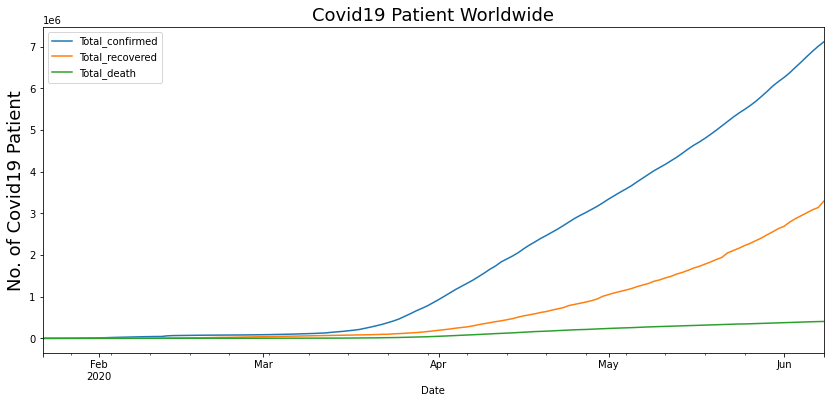

In [101]:
plt.figure(figsize = (14,6))

plt.ylabel('No. of Covid19 Patient',fontsize = 18)
plt.title("Covid19 Patient Worldwide",fontsize = 18)
daily_cases['Total_confirmed'].plot()
daily_cases['Total_recovered'].plot()
daily_cases['Total_death'].plot()
plt.legend()
plt.show()

#### Showing percentage distribution of corona cases constituting Confirmed,Recovered,Death cases in percentage worldwide

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


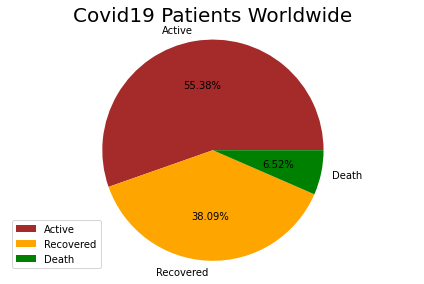

In [102]:
data = [{'Active_cases':country_corona_cases['Active_cases'].sum(),'Recovered':country_corona_cases['Total_recovered'].sum(),'Death':country_corona_cases['Total_death'].sum()}]
df  = pd.DataFrame(data,index =['First'])

labels = ['Active','Recovered','Death']
colors  = ['brown','Orange','green']
plt.title("Covid19 Patients Worldwide",size = 20)
plt.pie(df,labels = labels,colors = colors,autopct = "%0.2f%%",radius = 1)
plt.legend(loc ='lower left')
plt.tight_layout()
plt.axis('equal')
plt.show()


#### Countries having more than 1lakh confirmed  cases of Covid19

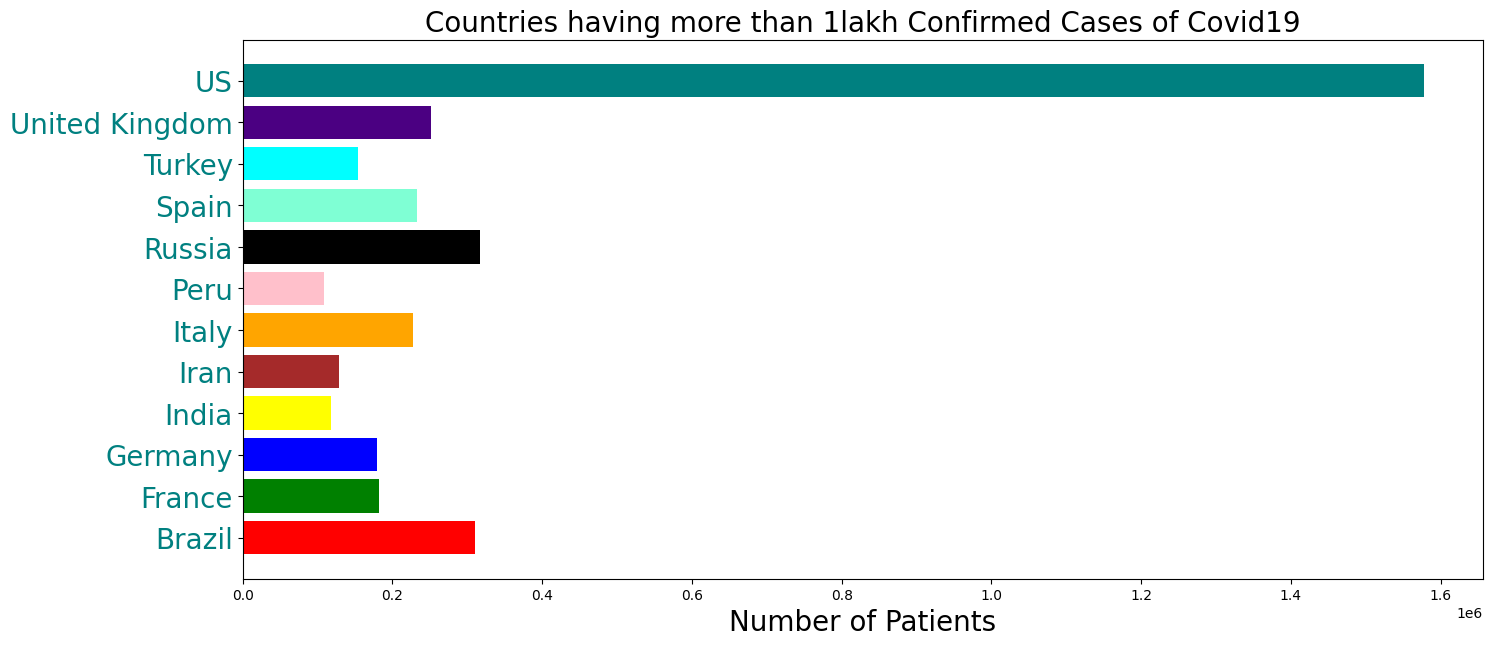

In [103]:
df1 = country_corona_cases[country_corona_cases['Total_confirmed']>= 100000]
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (16,7))


countries = ['Brazil', 'France', 'Germany', 'India', 'Iran', 'Italy', 'Peru','Russia', 'Spain', 'Turkey','United Kingdom','US']
y_pos = np.arange(len(countries))
performance = df1['Total_confirmed']
error = np.random.rand(len(countries))

ax.barh(y_pos, performance, xerr=error, align='center',color = ['red','green','blue','yellow','brown','orange','pink','black','aquamarine','cyan','indigo','teal'])
ax.set_yticks(y_pos)
ax.set_yticklabels(countries,size = 20,color = 'teal')
ax.set_xlabel('Number of Patients',size = 20)
ax.set_title('Countries having more than 1lakh Confirmed Cases of Covid19',size = 20)

plt.show()

#### countries having more than 20000 death case due to Covid19

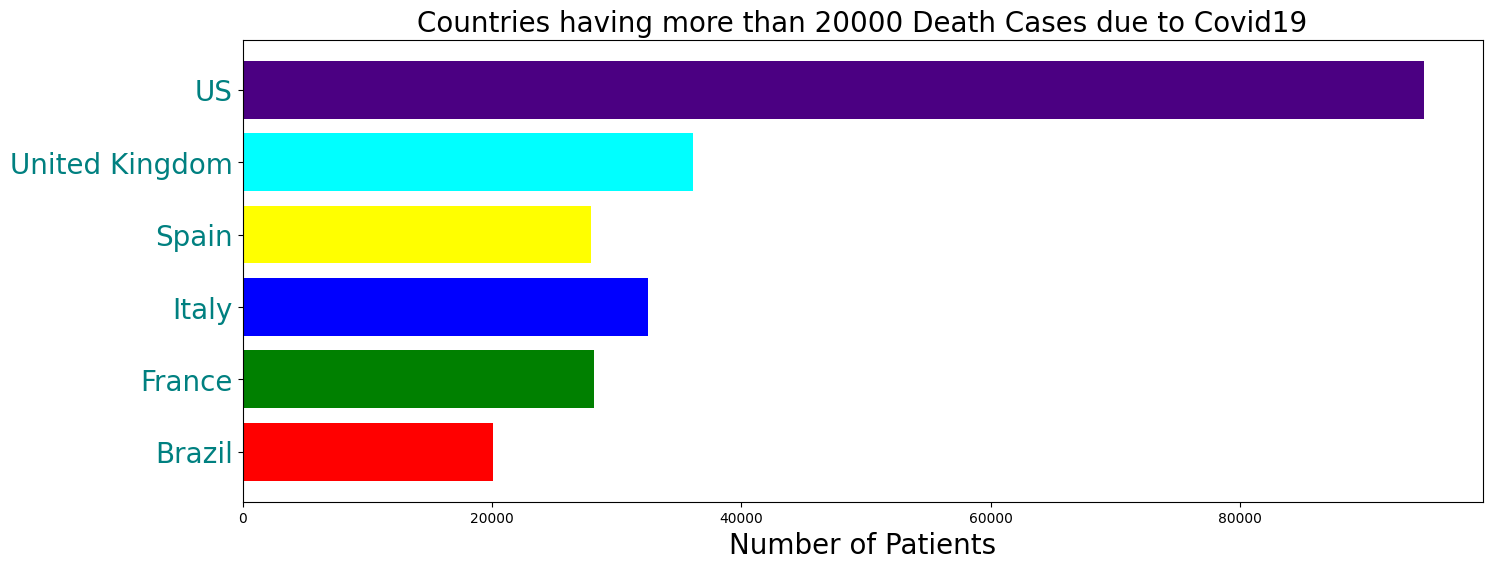

In [104]:
df2 = country_corona_cases[country_corona_cases['Total_death']>= 20000]
plt.rcdefaults()
fig, ax = plt.subplots(figsize = (16,6))


countries = ['Brazil','France','Italy','Spain','United Kingdom','US']
y_pos = np.arange(len(countries))
performance = df2['Total_death']
error = np.random.rand(len(countries))

ax.barh(y_pos, performance, xerr=error, align='center',color = ['red','green','blue','yellow','cyan','indigo'])
ax.set_yticks(y_pos)
ax.set_yticklabels(countries,size = 20,color = 'teal')
ax.set_xlabel('Number of Patients',size = 20)
ax.set_title('Countries having more than 20000 Death Cases due to Covid19',size = 20)

plt.show()

### Showing countries have more than 1.75 lakh confirmed cases of covid19 with their recovered and death cases simultaneouly

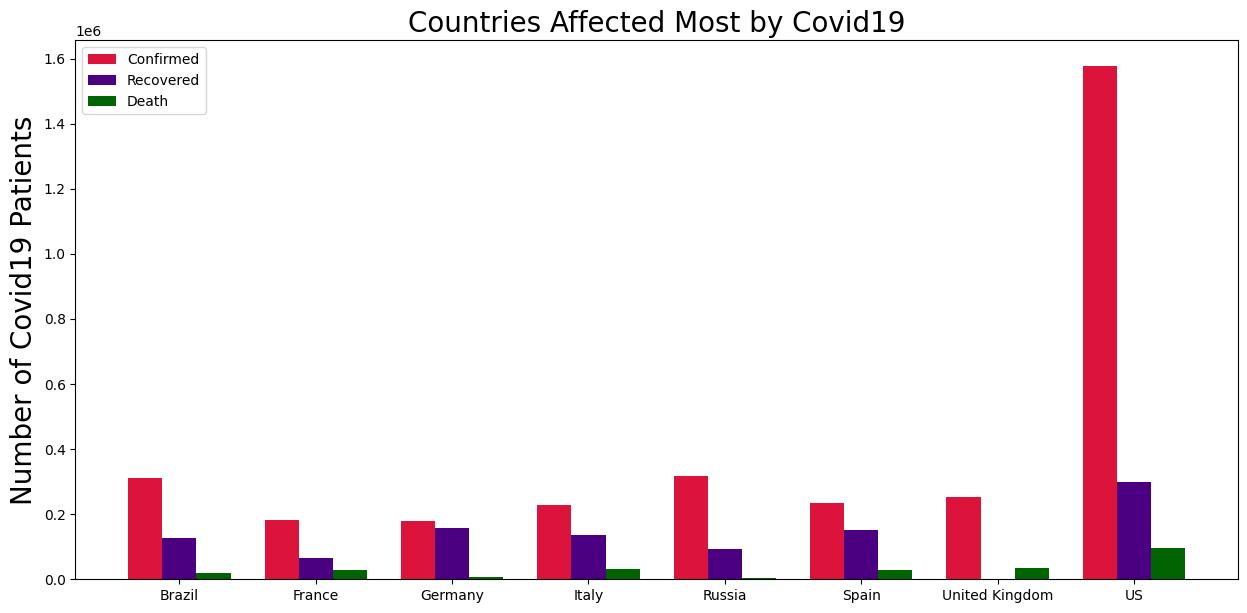

In [105]:
# Countries having confirmed corona cases more than 1 lakh and their death number
df3 = country_corona_cases[country_corona_cases['Total_confirmed']>= 175000]
countries = ['Brazil','France','Germany','Italy','Russia','Spain','United Kingdom','US']
xpos = np.arange(len(countries))
plt.figure(figsize = (15,7))
plt.title("Countries Affected Most by Covid19",size = 20)
plt.ylabel('Number of Covid19 Patients',size = 20)
plt.xticks(xpos,countries)
plt.bar(xpos-0.25,df3['Total_confirmed'],width= 0.25,label= "Confirmed",color = 'crimson')
plt.bar(xpos,df3['Total_recovered'],width = 0.25,label = "Recovered",color = 'indigo')
plt.bar(xpos+0.25,df3['Total_death'],width = 0.25,label = "Death",color = 'darkgreen')
plt.legend(loc = 'upper left')
plt.show()

# Prediction

### Prediction of Confirmed Cases worldwide

In [106]:
daily_cases.head()

,Total_confirmed,Total_recovered,Total_death
Date,,,
2020-01-22,555,28,17
2020-01-23,654,30,18
2020-01-24,941,36,26
2020-01-25,1434,39,42
2020-01-26,2118,52,56


In [107]:
dataset = daily_cases[['Total_confirmed']]
dataset

,Total_confirmed
Date,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
...,...
2020-06-04,6632985
2020-06-05,6764918
2020-06-06,6891213


In [108]:
dataset.size

139

In [0]:
data = np.array(dataset).reshape(-1,1)
train_data = dataset[:len(dataset)-27]
test_data = dataset[len(dataset)-27:]

In [131]:
train_data

,Total_confirmed
Date,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
...,...
2020-05-08,3938064
2020-05-09,4024009
2020-05-10,4101699


In [132]:
test_data

,Total_confirmed
Date,
2020-05-13,4347018
2020-05-14,4442163
2020-05-15,4542347
2020-05-16,4634068
2020-05-17,4713620
2020-05-18,4801943
2020-05-19,4897492
2020-05-20,4996472
2020-05-21,5102424


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [134]:
scaled_train_data

array([[0.00000000e+00],
       [2.32329358e-05],
       [9.05849819e-05],
       [2.06280308e-04],
       [3.66798774e-04],
       [5.56651754e-04],
       [1.17877814e-03],
       [1.31676770e-03],
       [1.80207792e-03],
       [2.19938459e-03],
       [2.69478587e-03],
       [3.80926276e-03],
       [4.53535067e-03],
       [5.47663658e-03],
       [6.35502930e-03],
       [7.09637116e-03],
       [7.94050116e-03],
       [8.58093228e-03],
       [9.29200092e-03],
       [9.90497495e-03],
       [1.03837142e-02],
       [1.04820435e-02],
       [1.40366827e-02],
       [1.55660670e-02],
       [1.60694472e-02],
       [1.65843266e-02],
       [1.70616579e-02],
       [1.75023796e-02],
       [1.76204217e-02],
       [1.77513710e-02],
       [1.78973395e-02],
       [1.83087268e-02],
       [1.83993117e-02],
       [1.85408214e-02],
       [1.87391228e-02],
       [1.89695747e-02],
       [1.92882649e-02],
       [1.96088325e-02],
       [2.00544824e-02],
       [2.06078487e-02],


In [135]:
scaled_test_data

array([[1.02001107],
       [1.04233933],
       [1.06585012],
       [1.08737485],
       [1.1060438 ],
       [1.1267711 ],
       [1.14919417],
       [1.17242241],
       [1.19728682],
       [1.22280362],
       [1.24623932],
       [1.26890739],
       [1.28942934],
       [1.31162149],
       [1.33559694],
       [1.36309066],
       [1.39168242],
       [1.42177635],
       [1.44710471],
       [1.47031558],
       [1.49668966],
       [1.52729096],
       [1.55647293],
       [1.58743445],
       [1.61707288],
       [1.64503125],
       [1.6704049 ]])

In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
n_input = 3
n_features = 1

generator = TimeseriesGenerator(scaled_train_data,scaled_train_data,length = n_input,batch_size = 1)

lstm_model = Sequential()
lstm_model.add(LSTM(19,activation = 'relu',input_shape = (n_input,n_features)))
lstm_model.add(Dense(10))
lstm_model.add(Dense(5))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer = 'adam',loss = 'mse')
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 19)                1596      
_________________________________________________________________
dense (Dense)                (None, 10)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


In [137]:
lstm_model.fit_generator(generator,epochs = 28)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/28
109/109 [==============================] - 0s 2ms/step - loss: 0.0714
Epoch 2/28
109/109 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 3/28
109/109 [==============================] - 0s 2ms/step - loss: 8.2860e-05
Epoch 4/28
109/109 [==============================] - 0s 2ms/step - loss: 5.8023e-05
Epoch 5/28
109/109 [==============================] - 0s 2ms/step - loss: 5.5171e-05
Epoch 6/28
109/109 [==============================] - 0s 2ms/step - loss: 4.9126e-05
Epoch 7/28
109/109 [==============================] - 0s 2ms/step - loss: 4.0894e-05
Epoch 8/28
109/109 [==============================] - 0s 2ms/step - loss: 3.1676e-05
Epoch 9/28
109/109 [==============================] - 0s 2ms/step - loss: 3.4528e-05
Epoch 10/28
109/109 [==============================] - 0s 2ms/step - loss: 2.5929e-05
Epoch 11/28
109/109 [==============================] - 0s 2ms/step - loss: 2.1375

AttributeError: ignored

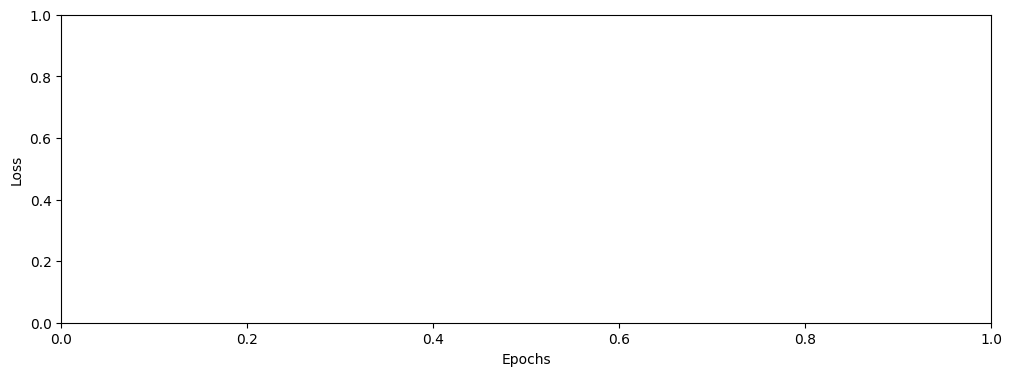

In [139]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize = (12,4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arrange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm)
